In [1]:
import pandas as pd
import numpy as np

avs = ["Ad-Aware", "AhnLab-V3", "Acronis", "Ad-Aware", "Alibaba", "ALYac", "Antiy-AVL", "Avast", "AVG", 
       "Avira (no cloud)", "BitDefender", "BitDefenderTheta", "Comodo", 
       "CrowdStrike Falcon", "Cybereason", "Cylance", "Cynet", "Cyren", "DrWeb", 
       " Elastic", "Emsisoft", "eScan", "ESET-NOD32", "Fortinet", "GData", "Ikarus", 
       "Jiangmin", "K7AntiVirus", "K7GW", "Kaspersky", "Lionic", "Malwarebytes", "MAX", 
       "McAfee", "McAfee-GW-Edition", "Microsoft", "NANO-Antivirus", "Palo Alto Networks", 
       "Panda", "QuickHeal", "Sangfor Engine Zero", "SecureAge", "SentinelOne (Static ML)", 
       "Sophos", "Symantec", "Tencent", "Trellix (FireEye)", "TrendMicro", "TrendMicro-HouseCall", 
       "VBA32", "VIPRE", "Yandex", "Zillya", "ZoneAlarm by Check Point", "Acronis (Static ML)", "Arcabit",
       "Baidu", "Bkav Pro", "ClamAV", "CMC", "Gridinsoft (no cloud)", "Kingsoft", "MaxSecure",
       "Rising", "SUPERAntiSpyware", "TACHYON", "ViRobot", "Webroot", "WithSecure", "Zoner", "Avast-Mobile", 
       "BitDefenderFalx", "Symantec Mobile Insight", "Trapmine", "Trustlook", "SuperAntiSpyware"]

def removeAllOccurenceStr(inputs, target:str):
    while (inputs.count(target)):
        inputs.remove(target) 
    return inputs

def removeAllOccurenceList(inputs, ls:list):
    for l in ls:
        ls = removeAllOccurenceStr(inputs, l.lower())
    return inputs

def findType1(vt:list):
    '''
    List from VirusTotal:
    ["adware","banker","downloader","dropper","fakeav","hacktool","miner","phishing","pua","ransomware","spyware","trojan","virus","worm"]
    Disregard phishing and fakeav
    '''
    types = [['trojan', 0],['adware',0],['downloader',0],['ransomware',0],['miner',0],['dropper',0],['pua',0],['virus',0],['miner',0],['undetected',0],['worm',0],['spyware',0],['banker',0]]
    for v in vt:
        if "troj" in v or "trj" in v:
            types[0][1] += 1
        if "adw" in v:
            types[1][1] += 1
        if "down" in v:
            types[2][1] += 1
        if "rans" in v:
            types[3][1] += 1
        if "mine" in v or "crypt" in v:
            types[4][1] += 1
        if "drop" in v:
            types[5][1] += 1
        if "pua" in v or "pup" in v or "susp" in v or "bundl" in v or "gray" in v or "grey" in v:
            types[6][1] += 1
        if "vir" in v:
            types[7][1] += 1
        if "hack" in v:
            types[8][1] += 1
        if "undetected" in v:
            types[9][1] += 1
        if "worm" in v:
            types[10][1] += 1
        if "spy" in v or "backd" in v:
            types[11][1] += 1
        if "bank" in v:
            types[12][1] += 1
    types[9][1] = int(types[9][1]*.05) # <=== Normalizing quantity 'undetected' to be non-invasive of other malware types.
    types.sort(key=lambda x: x[1], reverse=True)
    print(types,"\n")
    return types

filename = '(EDITED) DBSCAN_SampleHash_Common.csv' # <== Update this to point to the <Data_Clustering>_SampleHash_Common.csv file
df = pd.read_csv(filename)
df

,cluster,hash,Type 1,Type 2,Type 3,pattern
0,-1,5e1f079fc9130cd508568da3cb0b219a,Alibaba\nAdWare:Win32/MPCCleaner.9ddacee2\nALY...,_,_,"SetErrorMode,OleInitialize,LdrGetDllHandle,Ldr..."
1,-1,2b05809d67062f0af9fec37f33d1b338,DrWeb\nAdware.GameVance.268\neGambit\nUnsafe.A...,_,_,"SetErrorMode,OleInitialize,LdrGetDllHandle,Ldr..."
2,-1,e8a9d42e07c25d00fcc56170e66071fd,DrWeb\nAdware.GameVance.274\neGambit\nUnsafe.A...,_,_,"SetErrorMode,OleInitialize,LdrGetDllHandle,Ldr..."
3,-1,01e2cd4d45e8bc2608f3519a653d3a63,Acronis (Static ML)\nUndetected\nAhnLab-V3\nUn...,_,_,"SetErrorMode,OleInitialize,LdrGetDllHandle,Ldr..."
4,-1,d93b214c093a9f1e07248962aeb74fc8,AhnLab-V3\nUnwanted/Win32.Ammyy.C2371716\nAlib...,_,_,"SetErrorMode,OleInitialize,LdrGetDllHandle,Ldr..."
...,...,...,...,...,...,...
1490,297,05b379055a79c5e47bdabec418190ac7,Ad-Aware\nApplication.Agent.IAT\nAhnLab-V3\nPU...,_,_,"GetSystemTimeAsFileTime,LdrLoadDll,LdrGetProce..."
1491,297,d8c65468405b789c56754336c1f8911b,Ad-Aware\nApplication.Agent.IAT\nAhnLab-V3\nPU...,_,_,"GetSystemTimeAsFileTime,LdrLoadDll,LdrGetProce..."
1492,297,4b58a7c885df8e86be4769fd949d2c37,Acronis (Static ML)\nSuspicious\nAhnLab-V3\nPU...,_,_,"GetSystemTimeAsFileTime,LdrLoadDll,LdrGetProce..."
1493,297,a4200ec0b146d8a0d37e90e32c674780,Acronis (Static ML)\nSuspicious\nAd-Aware\nApp...,_,_,"GetSystemTimeAsFileTime,LdrLoadDll,LdrGetProce..."


In [2]:
for r in range(df.shape[0]):
    vt = df.iloc[r,2].lower().split("\n")
    for v in range(len(vt)):
        vt[v] = vt[v].strip()
    vt = removeAllOccurenceList(vt, avs)
    vt = removeAllOccurenceStr(vt, "Unable to process file type".lower())
    vt.sort()
    df.iloc[r,2] = findType1(vt)[0][0]

[['adware', 20], ['pua', 11], ['trojan', 3], ['virus', 3], ['dropper', 1], ['undetected', 1], ['downloader', 0], ['ransomware', 0], ['miner', 0], ['miner', 0], ['worm', 0], ['spyware', 0], ['banker', 0]] 

[['undetected', 3], ['adware', 1], ['trojan', 0], ['downloader', 0], ['ransomware', 0], ['miner', 0], ['dropper', 0], ['pua', 0], ['virus', 0], ['miner', 0], ['worm', 0], ['spyware', 0], ['banker', 0]] 

[['undetected', 3], ['adware', 1], ['trojan', 0], ['downloader', 0], ['ransomware', 0], ['miner', 0], ['dropper', 0], ['pua', 0], ['virus', 0], ['miner', 0], ['worm', 0], ['spyware', 0], ['banker', 0]] 

[['undetected', 3], ['virus', 1], ['trojan', 0], ['adware', 0], ['downloader', 0], ['ransomware', 0], ['miner', 0], ['dropper', 0], ['pua', 0], ['miner', 0], ['worm', 0], ['spyware', 0], ['banker', 0]] 

[['trojan', 21], ['downloader', 5], ['pua', 2], ['virus', 2], ['miner', 2], ['spyware', 1], ['adware', 0], ['ransomware', 0], ['miner', 0], ['dropper', 0], ['undetected', 0], ['worm'

,cluster,hash,Type 1,Type 2,Type 3,pattern
0,-1,5e1f079fc9130cd508568da3cb0b219a,adware,_,_,"SetErrorMode,OleInitialize,LdrGetDllHandle,Ldr..."
1,-1,2b05809d67062f0af9fec37f33d1b338,_,_,_,"SetErrorMode,OleInitialize,LdrGetDllHandle,Ldr..."
2,-1,e8a9d42e07c25d00fcc56170e66071fd,_,_,_,"SetErrorMode,OleInitialize,LdrGetDllHandle,Ldr..."
3,-1,01e2cd4d45e8bc2608f3519a653d3a63,_,_,_,"SetErrorMode,OleInitialize,LdrGetDllHandle,Ldr..."
4,-1,d93b214c093a9f1e07248962aeb74fc8,trojan,_,_,"SetErrorMode,OleInitialize,LdrGetDllHandle,Ldr..."
...,...,...,...,...,...,...
1490,297,05b379055a79c5e47bdabec418190ac7,trojan,_,_,"GetSystemTimeAsFileTime,LdrLoadDll,LdrGetProce..."
1491,297,d8c65468405b789c56754336c1f8911b,trojan,_,_,"GetSystemTimeAsFileTime,LdrLoadDll,LdrGetProce..."
1492,297,4b58a7c885df8e86be4769fd949d2c37,trojan,_,_,"GetSystemTimeAsFileTime,LdrLoadDll,LdrGetProce..."
1493,297,a4200ec0b146d8a0d37e90e32c674780,trojan,_,_,"GetSystemTimeAsFileTime,LdrLoadDll,LdrGetProce..."


Type 1
trojan        1133
_              120
adware          78
pua             76
downloader      63
ransomware      10
miner            9
spyware          6
Name: count, dtype: int64

<Axes: ylabel='Type 1'>

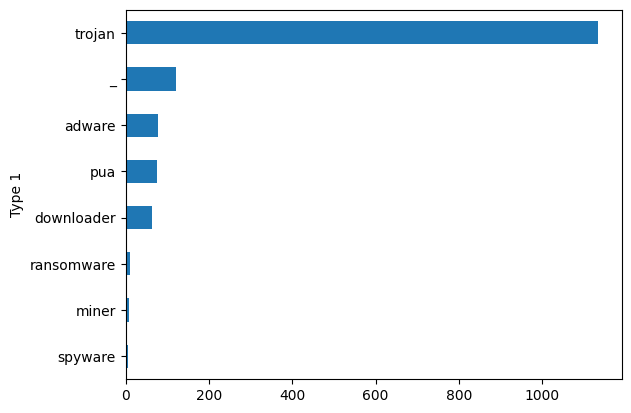

In [3]:
df.replace(to_replace='undetected', value='_', inplace=True) # <=== Replaces 'undetected' with '_'
df.to_csv('Converted_'+filename, index=False)
display(df)

cluster = df['cluster'].unique().tolist()
for c in cluster:
    counts = df[df['cluster'] == c]['Type 1'].value_counts()
    idx = counts.index.tolist()[0]
display(df['Type 1'].value_counts())

df['Type 1'].value_counts(ascending=True).plot(kind='barh')